<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:

bc = pd.read_csv('../DATA/breast-cancer-wisconsin-data.csv', header = 0)
bc.head().T

0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                   2019      1956      1709     567.7      1575
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN

In [20]:
bc['Unnamed: 32'].unique()

array([nan])

In [21]:
#count null values
bc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
bc.columns.str.contains('^Unnamed')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [23]:
#drop unnamed column
bc.drop(bc.columns[bc.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
bc.head().T


0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                   2019      1956      1709     567.7      1575
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [24]:
#check d-types
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
#statistical data
bc.describe().T


count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

-  We have quite a few columns whose minimum is zero. While we don't have null values in the columns per se, it seem that we have defaulted to zero

In [31]:
#check for unique IDs
bc['id'].value_counts().sum()

569

Total of 569 unique IDs, so we can probably set the sample ID as the Index

In [34]:
bc.set_index('id', inplace=True)
bc.head().T

id                       842302    842517    84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                   2019      1956      1709     567.7      1575
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678

In [44]:
bc[(bc == 0)].count()
#sns.heatmap(titanic.isnull(), cbar=False)

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [47]:
#below are the 13 observations with missing data
bc[(bc['concavity_mean'] == 0)].T

id                       862722    868999    871642    872113    875099   \
diagnosis                      B         B         B         B         B   
radius_mean                6.981     9.738     10.66     8.671      9.72   
texture_mean               13.43     11.97     15.15     14.45     18.22   
perimeter_mean             43.79     61.24     67.49     54.42     60.73   
area_mean                  143.5     288.5     349.6     227.2     288.1   
smoothness_mean            0.117    0.0925   0.08792   0.09138    0.0695   
compactness_mean         0.07568   0.04102   0.04302   0.04276   0.02344   
concavity_mean                 0         0         0         0         0   
concave points_mean            0         0         0         0         0   
symmetry_mean              0.193    0.1903    0.1928    0.1722    0.1653   
fractal_dimension_mean   0.07818   0.06422   0.05975   0.06724   0.06447   
radius_se                 0.2241    0.1988    0.3309    0.2204    0.3539   
texture_se                 1.508     0.496     1.925    0.7873     4.885   
perimeter_se               1.553     1.218     2.155     1.435      2.23   
area_se                    9.833     12.26     21.98     11.36     21.69   
smoothness_se            0.01019   0.00604  0.008713  0.009172  0.001713   
compactness_se           0.01084  0.005656   0.01017  0.008007  0.006736   
concavity_se                   0         0         0         0         0   
concave points_se              0         0         0         0         0   
symmetry_se              0.02659   0.02277   0.03265   0.02711   0.03799   
fractal_dimension_se      0.0041   0.00322  0.001002  0.003399  0.001688   
radius_worst                7.93     10.62     11.54     9.262     9.968   
texture_worst              19.54      14.1      19.2     17.04     20.83   
perimeter_worst            50.41     66.53      73.2     58.36     62.25   
area_worst                 185.2     342.9     408.3     259.2     303.8   
smoothness_worst          0.1584    0.1234    0.1076    0.1162   0.07117   
compactness_worst         0.1202   0.07204   0.06791   0.07057   0.02729   
concavity_worst                0         0         0         0         0   
concave points_worst           0         0         0         0         0   
symmetry_worst            0.2932    0.3105     0.271    0.2592    0.1909   
fractal_dimension_worst  0.09382   0.08151   0.06164   0.07848   0.06559   

id                       894047    903483    9113846   921092    923748   \
diagnosis                      B         B         B         B         B   
radius_mean                8.597     8.734     12.27     7.729     10.86   
texture_mean                18.6     16.84     29.97     25.49     21.48   
perimeter_mean             54.09     55.27     77.42     47.98     68.51   
area_mean                  221.2     234.3     465.4     178.8     360.5   
smoothness_mean           0.1074    0.1039   0.07699   0.08098   0.07431   
compactness_mean         0.05847   0.07428   0.03398   0.04878   0.04227   
concavity_mean                 0         0         0         0         0   
concave points_mean            0         0         0         0         0   
symmetry_mean             0.2163    0.1985    0.1701     0.187    0.1661   
fractal_dimension_mean   0.07359   0.07098    0.0596   0.07285   0.05948   
radius_se                 0.3368    0.5169    0.4455    0.3777    0.3163   
texture_se                 2.777     2.079     3.647     1.462     1.304   
perimeter_se               2.222     3.167     2.884     2.492     2.115   
area_se                    17.81     28.85     35.13     19.14     20.67   
smoothness_se            0.02075   0.01582  0.007339   0.01266  0.009579   
compactness_se           0.01403   0.01966  0.008243  0.009692   0.01104   
concavity_se                   0         0         0         0         0   
concave points_se              0         0         0         0         0   
symmetry_se              0.06146   0.01865   0.

- 13 out of the 569 (2.2%) rows of data have zero values for concavity_mean, concave_points_mean, concavity_set, concave points_se, concavity_worst, concave_points_worst
- While small, the data seems well populated for the other variables, so it might be better to fill the values with means/medians instead of losing 13 observations from the entire dataset
- Also note that these are all benign samples. We will conduct further EDA to determine if there is a material difference between either benign or malignant samples, specific to these missing variables

In [55]:
#Create two separate dataframes for Benign and malignant results
bcb = bc[(bc['diagnosis'] == 'B')]
bcm = bc[(bc['diagnosis'] == 'M')]
missing_rows = ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']

bcb[missing_rows].describe().T

count      mean       std  min       25%       50%  \
concavity_mean        357.0  0.046058  0.043442  0.0  0.020310  0.037090   
concave points_mean   357.0  0.025717  0.015909  0.0  0.015020  0.023440   
concavity_se          357.0  0.025997  0.032918  0.0  0.010990  0.018400   
concave points_se     357.0  0.009858  0.005709  0.0  0.006433  0.009061   
concavity_worst       357.0  0.166238  0.140368  0.0  0.077080  0.141200   
concave points_worst  357.0  0.074444  0.035797  0.0  0.051040  0.074310   

                          75%      max  
concavity_mean        0.05999  0.41080  
concave points_mean   0.03251  0.08534  
concavity_se          0.03056  0.39600  
concave points_se     0.01187  0.05279  
concavity_worst       0.22160  1.25200  
concave points_worst  0.09749  0.17500

In [56]:
bcm[missing_rows].describe().T

count      mean       std       min       25%       50%  \
concavity_mean        212.0  0.160775  0.075019  0.023980  0.109525  0.151350   
concave points_mean   212.0  0.087990  0.034374  0.020310  0.064620  0.086280   
concavity_se          212.0  0.041824  0.021603  0.011010  0.026998  0.037125   
concave points_se     212.0  0.015060  0.005517  0.005174  0.011415  0.014205   
concavity_worst       212.0  0.450606  0.181507  0.023980  0.326425  0.404900   
concave points_worst  212.0  0.182237  0.046308  0.028990  0.152750  0.182000   

                           75%     max  
concavity_mean        0.203050  0.4268  
concave points_mean   0.103175  0.2012  
concavity_se          0.050443  0.1438  
concave points_se     0.017497  0.0409  
concavity_worst       0.556175  1.1700  
concave points_worst  0.210675  0.2910

- There is clearly a material difference between benign and material samples, specific to the missing variables we are trying to fill for

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [0]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [0]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

No handles with labels found to put in legend.


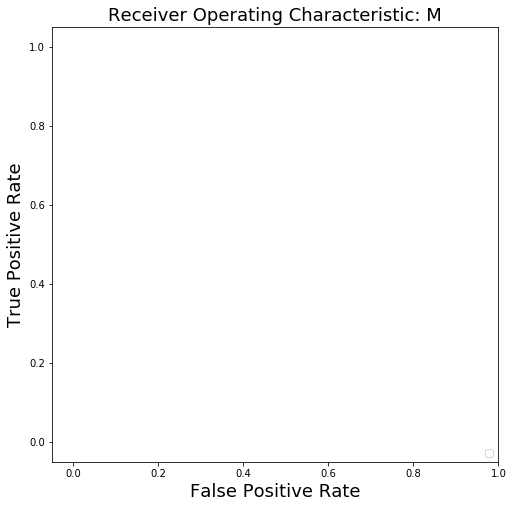

In [0]:
plt.figure(figsize=[8,8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



